<a href="https://colab.research.google.com/github/snjauregui/kaggle-courses/blob/main/TP1_Properati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Library Imports

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
print("Setup Complete")


Setup Complete


## Load data

In [198]:
properatti_data_filepath = '/content/drive/MyDrive/Colab Notebooks/Data Science - Digital House/properatti.csv'
properatti_data = pd.read_csv(properatti_data_filepath)

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75


properatti_data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_l...,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0...


In [199]:
list(properatti_data.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail']

In [200]:
properatti_data.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

# Checks

##  Column values

In [201]:
operation = properatti_data['operation'].unique()
print(operation)

['sell']


In [202]:
property_type = properatti_data['property_type'].unique()
print(property_type)

['PH' 'apartment' 'house' 'store']


In [203]:
country_name = properatti_data['country_name'].unique()
print(country_name)

['Argentina']


In [204]:
state_name = properatti_data['state_name'].unique()
print(state_name)

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']


In [205]:
currency = properatti_data['currency'].unique()
print(currency)

['USD' nan 'ARS' 'PEN' 'UYU']


## null Check

In [206]:
percent_missing = properatti_data.isnull().sum() * 100 / len(properatti_data)
missing_value_df = pd.DataFrame({'column_name': properatti_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
operation,operation,0.000000
property_type,property_type,0.000000
place_name,place_name,0.018974
place_with_parent_names,place_with_parent_names,0.000000
country_name,country_name,0.000000
state_name,state_name,0.000000
geonames_id,geonames_id,15.440521
lat-lon,lat-lon,42.525986
lat,lat,42.525986


### Chequeamos los registros que son nulos en precio o en superficie

In [207]:
properatti_data_nulls = properatti_data
properatti_data_nulls['price_per_m2_test'] = properatti_data_nulls['price_aprox_usd'] / properatti_data_nulls['surface_total_in_m2']

percent_missing = properatti_data_nulls.isnull().sum() * 100 / len(properatti_data_nulls)
missing_value_df = pd.DataFrame({'column_name': properatti_data_nulls.columns,
                                 'percent_missing': percent_missing})
missing_value_df


,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
operation,operation,0.000000
property_type,property_type,0.000000
place_name,place_name,0.018974
place_with_parent_names,place_with_parent_names,0.000000
country_name,country_name,0.000000
state_name,state_name,0.000000
geonames_id,geonames_id,15.440521
lat-lon,lat-lon,42.525986
lat,lat,42.525986


## Cantidad de ambientes

In [208]:
properatti_data_amb = properatti_data[properatti_data.title.str.contains("amb", case=False)]
properatti_data_amb.head()


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,price_per_m2_test
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...,1127.272727
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0...,1309.090909
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...,NaN
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f5l8TrxdY-0kvs=/trim/198x0...,1828.571429
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_departamentos_belgrano_lavadero...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO CO...,"JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CATEGORIA , VENTA",https://thumbs4.properati.com/1/IHxARynlr8sPEWmzhxVZ2cfRb6M=/trim/198x0...,3066.666667


In [209]:
properatti_data_regex = properatti_data
properatti_data_regex['ambientes'] = properatti_data.description.str.extract('([0-9]*) amb')

In [210]:
properatti_data_regex[properatti_data_regex['ambientes'].notnull()]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,price_per_m2_test,ambientes
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0...,NaN,3
11,11,sell,house,San Miguel,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5390571,-58.7196093",-34.539057,-58.719609,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bp0_venta_casa_san-miguel_jardin_lavadero...,"Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete...",CHALET,https://thumbs4.properati.com/4/pH0MnS_2zCGOHRjDwCvDGa9d3vI=/trim/198x0...,NaN,1
13,13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,NaN,111700.0,USD,1970890.65,111700.00,50.0,30.0,2234.000000,3723.333333,NaN,1.0,NaN,http://www.properati.com.ar/15bp9_venta_departamentos_palermo-soho_gimn...,Torre I Mondrian. 3 ambientes con terraza y dos baños al frente.Vitrau...,Vitraux Palermo,https://thumbs4.properati.com/2/ZTUjkRzTz6YvcUeEoqM-LnrvhUk=/trim/198x0...,2234.000000,3
16,16,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",-34.652356,-58.501624,239000.0,USD,4217035.50,239000.00,140.0,98.0,1707.142857,2438.775510,NaN,4.0,NaN,http://www.properati.com.ar/15bpj_venta_ph_mataderos_suite_parrilla_toi...,Ventas Mataderos al frente Duplex 4 amb.- Planta Baja: Entrada de auto-...,VENTA-MATADEROS-DUPLEX 4 AMB.,https://thumbs4.properati.com/7/XSdJtiE8ZkWgonH-7f05Mzz4XM4=/trim/198x0...,1707.142857,4
17,17,sell,apartment,Barrio El Golf,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|Barrio El Golf|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4087174767,-58.6343892841",-34.408717,-58.634389,315000.0,USD,5558017.50,315000.00,176.0,78.0,1789.772727,4038.461538,NaN,3.0,NaN,http://www.properati.com.ar/15bpl_venta_departamentos_nordelta_balcon_s...,Excelente 3 ambientes en un 6 piso y con terraza propia en el 7 pisoEn ...,3 ambientes en venta en Acqua Golf 1 en Nordelta con espectacular vista...,https://thumbs4.properati.com/8/txJsOWitsI5tjM-QVxuoamv9pxE=/trim/198x0...,1789.772727,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121204,121204,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,1502000.0,ARS,1486331.74,84237.68,50.0,NaN,1684.753600,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj73_venta_departamento_cordoba_balcon_qui...,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departamento - Nueva Cordoba,NaN,1684.753600,
121205,121205,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,1507000.0,ARS,1491279.61,84518.10,50.0,NaN,1690.362000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj74_venta_departamento_cordoba_balcon_qui...,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departamento - Nueva Cordoba,NaN,1690.362000,
121206,121206,sell,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,1507000.0,ARS,1491279.61,84518.10,50.0,NaN,1690.362000,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1cj75_venta_departamento_cordoba_balcon_qui...,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos depa...",Departa

## Duplicados

In [211]:
list(properatti_data.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail',
 'price_per_m2_test',
 'ambientes']

In [212]:
properatti_data.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
price_per_m2_test              68866
a

In [213]:
properatti_data_wo_duplicates = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [214]:
properatti_data_wo_duplicates.count()

Unnamed: 0                    104056
operation                     104056
property_type                 104056
place_name                    104033
place_with_parent_names       104056
country_name                  104056
state_name                    104056
geonames_id                    87392
lat-lon                        61890
lat                            61890
lon                            61890
price                          88154
currency                       88154
price_aprox_local_currency     88154
price_aprox_usd                88154
surface_total_in_m2            68544
surface_covered_in_m2          86665
price_usd_per_m2               58924
price_per_m2                   76260
floor                           6054
rooms                          41619
expenses                       13193
properati_url                 104056
description                   104055
title                         104056
image_thumbnail               101901
price_per_m2_test              59173
a

Revisar si hay filas duplicadas

Ver de sumar algo geo 

Ver si podemos aprovechar algo de la descripción

hay 20k propiedades sin precio en dolares, pero esas tampoco tienen precio en ARS. Si filtramos a todas las propiedades sin precio podemos usar la columna que viene del dataset

Los nulos en el campo de currency son en los registros que no tienen precio.
¿Tiene sentido que nos quedemos con estos registros si vamos a usar el dataset para predecir precios de nuevas publicaciones?

nulls Check


Geo? 

Consideramos lat y lon, place_name, o ambos?

¿Normalizamos las monedas a una sola? Habría que flagear esos registros


# Limpieza

## Borro las columnas que no usamos

In [215]:
properatti_data = properatti_data[['operation',
 'property_type',
 'place_name',
 'country_name',
 'state_name',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',]]

properatti_data.head()

,operation,property_type,place_name,country_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,sell,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,Capital Federal,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE


## Borro las columnas que no tienen dato de precio

Cuando no tienen currency tampoco tienen los otros campos de price, es lo mismo cual elegís para limpiar

In [216]:
properatti_data = properatti_data[properatti_data['currency'].notnull()]
properatti_data.head(5)

,operation,property_type,place_name,country_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,sell,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,Capital Federal,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE


In [217]:
properatti_data.price_aprox_usd.count()

100809

In [218]:
properatti_data = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [219]:
properatti_data.count()

operation              88392
property_type          88392
place_name             88369
country_name           88392
state_name             88392
lat                    52482
lon                    52482
price                  88392
currency               88392
price_aprox_usd        88392
surface_total_in_m2    59351
price_usd_per_m2       59102
price_per_m2           76467
floor                   5450
rooms                  34977
expenses               12317
description            88391
title                  88392
dtype: int64

## Borro las publicaciones que no están en ARS o USD

In [220]:
properatti_data = properatti_data[properatti_data['currency'].isin(['ARS','USD'])]
properatti_data.head()

,operation,property_type,place_name,country_name,state_name,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
0,sell,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,Argentina,Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living come...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37
2,sell,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,Argentina,Capital Federal,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....",PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIF...",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE


# Columnas nuevas

In [221]:
#No amenities:
#Escalera
#Baulera


###amenities a considerar:
#Ascensor
#Pileta
#Iluminacion
#Cochera+garage+estacionamiento + guarda coche + guardacoche
#Parrilla 
#Laundry
#SUM
#Jardin
#Balcon


In [222]:
#Escalera
df_data_amenities= properatti_data
esc = df_data_amenities.description.str.contains("escalera", case=False)
df_data_amenities["Escalera"] = esc
df_data_amenities.value_counts('Escalera')


#Validacion
Con_Escalera = df_data_amenities['Escalera'] == True
df_data_amenities.value_counts(Con_Escalera)
pd.options.display.max_colwidth = 250
df_data_amenities.description[Con_Escalera]



35        Hermoso departamento de cuatro ambientes, refaccionado totalmente a nuevo tanto en los ambientes como en las instalaciones de gas, agua y electricidad. Segundo piso por escalera. Madera de primera calidad en todos los ambientes, el living está co...
46        Excelente Duplex, en Condominio con Seguridad.PB:Living -comedor,cocina integrados, toillete,dormitorio.Patio con Parrilla.PA: Dos dormitorios amplios con placard,Baño ( con toallero con radiador)y hall de distribucion.Pisos de Porcelanato, En lo...
58        Magnífica residencia con calidad de construcción superlativa. Se trata de un chalet con frente de ladrillo a la vista y techo pizarra. Desarrollado sobre un lote de 1300m2, totalmente soleado por su orientación Norte y entorno privado. Salida a d...
71        COMPLEjO DE DTOS. EN PH. DOS DTOS DE 3 AMB. EN PLANTA ALTA POR ESCALERA( UNO A LA CALLE Y EL OTRO AL C/FTE)CON COCHERASAMPLIAS MEDIDAS -A ESTRENAR.COCINA INTEGRADA AL LIVING COMEDOR ( CON SECTOR LAVADERO)BAÑO C

In [223]:
#Pileta

pileta = df_data_amenities.description.str.contains("pileta", case=False)
df_data_amenities["Pileta"] = pileta
df_data_amenities.value_counts('Pileta')


#Validacion
Con_Pileta = df_data_amenities['Pileta'] == True
df_data_amenities.value_counts(Con_Pileta)
df_data_amenities.description[Con_Pileta]

7         EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR  MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Pági...
8         EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR  MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Pági...
23        Hermoso departamento, ubicado en la calle Almirante Brown, a metros de colectora Panamericana  km 52, en la entrada a Pilar. Ademas de tener una  excelente ubicacion, este departamento esta ubicado en planta baja y tiene un lindo jardin, posee li...
30        Muy linda casa , toda en planta baja, doble pared de 30, ladrillo a la vista por dentro y fuera, pisos de ceramica blancos, techos de madera,esta en perfecto estado.Posee 3 dormitorios, 2 baños, cocina, living 

In [224]:
#Baulera
baul = df_data_amenities.description.str.contains(" Baulera", case=False)
df_data_amenities["Baulera"] = baul
df_data_amenities.value_counts('Baulera')


#Validacion
Con_Baulera = df_data_amenities['Baulera'] == True
df_data_amenities.value_counts(Con_Baulera)
df_data_amenities.description[Con_Baulera]


17        Excelente 3 ambientes en un 6 piso y con terraza propia en el 7 pisoEn la planta principal: Dormitorio principal en suite y Living comedor con vista al lago, Cocina integrada y lavadero, segundo baño completo que hace tambien de toilette, y el se...
19        Excelente semipiso al contra frente en Bulnes y Libertador. Espectacular pulmón muy luminoso con árboles. Buen edificio con entrada reciclada hace dos años. Hall de entrada. Living comedor de muy buenas dimensiones con salida al balcón aterrazado...
24        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORIA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO  para las unidades de primer y seg...
25        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTAD

In [225]:
#Ascensor
elev= ['elevador', 'ascensor']
ascensor = df_data_amenities.description.str.contains('|'.join(elev), case=False)
#ascensor.value_counts()
df_data_amenities["Ascensor"] = ascensor
df_data_amenities.value_counts('Ascensor')

#Validacion
Con_ascensor = df_data_amenities['Ascensor'] == True
df_data_amenities.value_counts(Con_ascensor)
pd.options.display.max_colwidth = 400
df_data_amenities.description[Con_ascensor]


24        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORIA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO  para las unidades de primer y segundo piso. FINANCIACION: ANTICIPO USD71.000, USD 105.000 A LA ESCRITURA Y EL RESTO FINANCIADO EN 36 CUOTAS (con refuerzos semestrales) VALOR FINANCIAD...
25        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO para las unidades de tercer y cuarto piso. FINANCIACIÓN: ANTICIPO USD 71.800, USD106.000 A LA ESCRITURA Y  EL RESTO FINANCIADO EN 36 CUOTAS (con refuerzos semestrales) VALOR FINANCIADO...
28        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO 

In [226]:
#Iluminacion
ilum= ['iluminacion', 'iluminación']
iluminacion = df_data_amenities.description.str.contains('|'.join(ilum), case=False)
df_data_amenities["Iluminacion"] = iluminacion
df_data_amenities.value_counts('Iluminacion')

#Validacion
Con_Ilum = df_data_amenities['Iluminacion'] == True
df_data_amenities.value_counts(Con_Ilum)
df_data_amenities.description[Con_Ilum]


4                                                                                            DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS,  1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
24        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORIA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO  para las unidades de primer y segundo piso. FINANCIACION: ANTICIPO USD71.000, USD 105.000 A LA ESCRITURA Y EL RESTO FINANCIADO EN 36 CUOTAS (con refuerzos semestrales) VALOR FINANCIAD...
25        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO 

In [227]:
#Cochera
coche= ['Cochera', 'garage', 'estacionamiento', 'guarda coche', 'guardacoche']
cochera = df_data_amenities.description.str.contains('|'.join(coche), case=False)
df_data_amenities["Cochera"] = cochera
df_data_amenities.value_counts('Cochera')

#Validacion
Con_cochera = df_data_amenities['Cochera'] == True
df_data_amenities.value_counts(Con_cochera)
df_data_amenities.description[Con_cochera]


1         Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publ...
10                                                                                                                                                            Hermosa casa sin terminar de 3 dormitorios, baño, living comedor, cocina, cochera.Techo de Madera. Con escritura y servicios. Lote de 1514 metros.                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
15        ULTIMA UNIDAD DISPONIBLEHAUS BOULEVARD: Metros Cubiertos: 115,23m²Contado U$D250.000HAUS VILLAGE es un complejo residencial de 20 casas con cochera y jardín propio, dentr

In [228]:
#Parrilla
parri= ['Parrilla']
Parrilla = df_data_amenities.description.str.contains('|'.join(parri), case=False)
df_data_amenities["Parrilla"] = Parrilla
df_data_amenities.value_counts('Parrilla')

#Validacion
Con_Parrilla = df_data_amenities['Parrilla'] == True
df_data_amenities.value_counts(Con_Parrilla)
df_data_amenities.description[Con_Parrilla]


16        Ventas Mataderos al frente Duplex 4 amb.- Planta Baja: Entrada de auto-Living Comedor- toilete, Cocina Comedor-diario- parque (4m x 10m) con parrilla. Planta Alta: 3 dormitorios-placard- 1 baño completo- Dormitorio principal en suite y vestidor. Todo luz y sol en excelente estado a metros de Av. J. B. Alberdi y Larrazabal ."Listo para vivir ya!!!Las medidas son aproximadas y al sólo efecto ori...
17        Excelente 3 ambientes en un 6 piso y con terraza propia en el 7 pisoEn la planta principal: Dormitorio principal en suite y Living comedor con vista al lago, Cocina integrada y lavadero, segundo baño completo que hace tambien de toilette, y el segundo dormitorio con placard con vista al verde. Parrilla y balcon.En la planta alta: una gran terraza preparado para instalar un jacuzzi.Cochera fija...
22        Edificada en 2 plantas. PB. amplio living con salida al parque, cocina con salida a la galería, todos los ambientes de pb con pisos de porcelanato.  Toilet de recepción, 

In [229]:
#Laundry

laun = df_data_amenities.description.str.contains("laundry", case=False)
df_data_amenities["Laundry"] = laun
df_data_amenities.value_counts('Laundry')


#Validacion
Con_Laundry = df_data_amenities['Laundry'] == True
df_data_amenities.value_counts(Con_Laundry)
df_data_amenities.description[Con_Laundry]

7                                                                                                                                      EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR  MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
8                                                                                                                                      EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR  MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
40        LINDÍSIMO DEPARTAMENTO EN VENTA, 3 AMBIENTES CON TERRAZA Y PARRILLA, A ESTRENAR EN CONDOMINIO TORTUGAS 3 - QUINTA LA JIMENA. ÚLTIMAS UNIDAD! OPORTUNIDAD!ENTREGA: ABRIL 20

In [230]:
#SUM

sum_ = df_data_amenities.description.str.contains(" sum ", case=False)
df_data_amenities["SUM"] = sum_
df_data_amenities.value_counts('SUM')


#Validacion
Con_SUM = df_data_amenities['SUM'] == True
df_data_amenities.value_counts(Con_SUM)
df_data_amenities.description[Con_SUM]

24        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORIA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO  para las unidades de primer y segundo piso. FINANCIACION: ANTICIPO USD71.000, USD 105.000 A LA ESCRITURA Y EL RESTO FINANCIADO EN 36 CUOTAS (con refuerzos semestrales) VALOR FINANCIAD...
25        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO PUBLICADO CORRESPONDE AL VALOR DE CONTADO para las unidades de tercer y cuarto piso. FINANCIACIÓN: ANTICIPO USD 71.800, USD106.000 A LA ESCRITURA Y  EL RESTO FINANCIADO EN 36 CUOTAS (con refuerzos semestrales) VALOR FINANCIADO...
28        EXCLUSIVO  DEPARTAMENTO DE EXCELENTE CATEGORÍA EN VENTA EN CASTELAR160 MTS2  Cubiertos.  4 ambientes con balcón terraza, parrilla y cochera. Entrega marzo 2018.EL PRECIO 

In [231]:
#Jardin

jard = df_data_amenities.description.str.contains(" Jardin ", case=False)
df_data_amenities["Jardin"] = jard
df_data_amenities.value_counts('Jardin')


#Validacion
Con_Jardin = df_data_amenities['Jardin'] == True
df_data_amenities.value_counts(Con_Jardin)
df_data_amenities.description[Con_Jardin]

51        Se encuentra dentro del Distrito Tecnológico. Casa antigua en estado impecable refaccionada a nuevo hace 8 años.Todo  con detalles de calidad y muy buen gusto. Amplio living y comedor en L con chimenea.Luminosa. Excelente estado. 3 dormitorios.3 baños completos.Living comerdor.Lavadero. Habitación de huéspedes con toilette.Terraza.Patio y jardin con pileta.  Cochera cubierta. Gran terraza con ...
104       Nordelta - LOS SAUCES -Excelente casa en dos plantas. MUY BUEN DISEÃO.Living comedor en ele. Cocina incorporada con barra.Escritorio en PB. BaÃ±o toilette con ducha. Lavadero. Dependencia con baÃ±o-.PA tres dormitorios. Principal en suite con vestidor y baÃ±o con doble bacha revestido en marmol. Los otros dos con un baÃ±o compartimentado en semisuite. Ambos con placard.Detalles de terminacion....
118       SimpÃ¡tico y clÃ¡sico chalet en 2 plantas (refaccionado en 1992)Porch de entrada - Hall - toilette de recepciÃ³n - Estar / comedor (7 x 4) - Cocina c/ breakfast ( 5 x 2,4

In [232]:
#Balcon

balc= [' Balcon', ' Balcón']
Balcon = df_data_amenities.description.str.contains('|'.join(balc), case=False)
#pileta.value_counts()
df_data_amenities["Balcon"] = Balcon
df_data_amenities.value_counts('Balcon')

#Validacion
Con_Balcon = df_data_amenities['Balcon'] == True
df_data_amenities.value_counts(Con_Balcon)
df_data_amenities.description[Con_Balcon]

1         Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publ...
12        EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENTE CON BALCON A PULMON DE MANZANA.A SOLO MEDIA CUADRA DE LA AV. SANTA FE.LIVING                   3,06 X 5,30 DORMITORIO          2,80 X 3,60     BAÑO                     1,55 X 2,11     COCINA                  1,60 X 3,13    BALCON                  4,61 X 1 POSEE DOS AIRES ACONDICIONADOS NUEVOS.TERRAZA.total cubiertos: 35,66semi  3,56total: 39,22  ...
13         Torre I Mondrian. 3 ambientes con terraza y dos baños al frente.Vitraux ofrece en el ultimo nivel, Piscina con Solarium, un espacio con Sala de Reunión para uso profesio

In [233]:
#amenities
amenities = ((df_data_amenities['Ascensor'] == True) | (df_data_amenities['Pileta'] == True) | 
(df_data_amenities['Cochera'] == True) | (df_data_amenities['Parrilla'] == True) | 
(df_data_amenities['Laundry'] == True) | (df_data_amenities['SUM'] == True) | (df_data_amenities['Balcon'] == True))

df_data_amenities["amenities"] = amenities
df_data_amenities.value_counts('amenities')

#Validacion
Con_amenities = df_data_amenities['amenities'] == True
df_data_amenities.value_counts(Con_amenities)
df_data_amenities.description[Con_amenities]

1         Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publ...
7                                                                                                                                      EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR  MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
8                                                                                                                                      EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPE

In [234]:
list(df_data_amenities.columns)

['operation',
 'property_type',
 'place_name',
 'country_name',
 'state_name',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',
 'Escalera',
 'Pileta',
 'Baulera',
 'Ascensor',
 'Iluminacion',
 'Cochera',
 'Parrilla',
 'Laundry',
 'SUM',
 'Jardin',
 'Balcon',
 'amenities']

combinacion de precio con superficie
descartar outliers

# Visualización

Text(0, 0.5, 'Count')

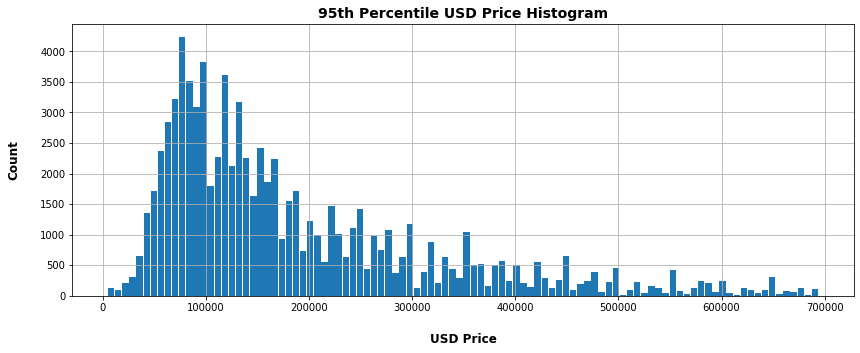

In [235]:
properatti_data_wo_nan_price_p95_price = properatti_data.loc[properatti_data['price_aprox_usd'] 
                                   < properatti_data.price_aprox_usd.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_price.price_aprox_usd.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("95th Percentile USD Price Histogram", weight='bold', size=14)
plt.set_xlabel("USD Price", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'Count')

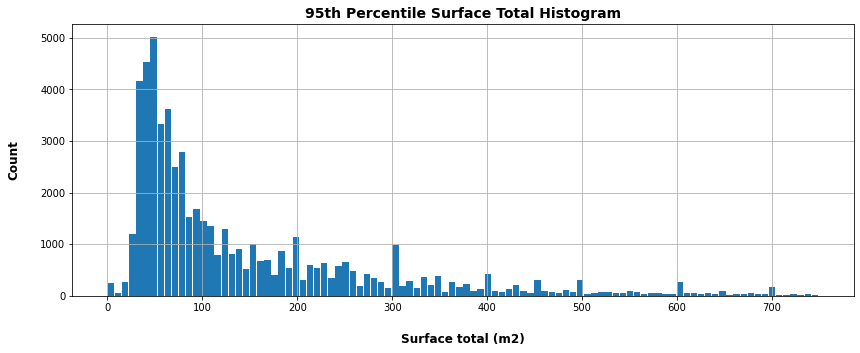

In [236]:
properatti_data_wo_nan_price_p95_surf = properatti_data.loc[properatti_data['surface_total_in_m2'] 
                                   < properatti_data.surface_total_in_m2.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_surf.surface_total_in_m2.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("95th Percentile Surface Total Histogram", weight='bold', size=14)
plt.set_xlabel("Surface total (m2)", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Count", labelpad=20, weight='bold', size=12)


Text(0, 0.5, 'Cantidad de propiedades')

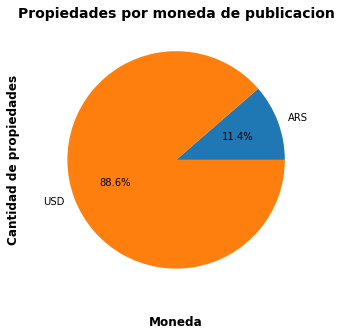

In [238]:
#@title Cantidad de propiedades por moneda de publicacion
propiedades_por_moneda = properatti_data.groupby('currency')['title'].count()

plt = propiedades_por_moneda.plot.pie(y="currency", figsize=(14, 5), autopct='%1.1f%%')

plt.set_title("Propiedades por moneda de publicacion", weight='bold', size=14)
plt.set_xlabel("Moneda", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Cantidad de propiedades", labelpad=20, weight='bold', size=12)